In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
import matplotlib.pyplot as plt
import numpy as np
import gc

import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [22]:
!pip install seaborn

In [13]:
class MyNet(nn.Module):
    def __init__(self, num_classes):
        super(MyNet, self).__init__()
        self.layer1 = nn.Linear(4, 16)
        self.layer2 = nn.Linear(16, num_classes)  # 输出层改为 num_classes 个神经元
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x  # 不需要最后的 ReLU，因为我们会使用 softmax

In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
import matplotlib.pyplot as plt
import gc

class cpugpu:
    def __init__(self, dataset_size=1000, device='cpu', num_classes=3):
        torch.manual_seed(42)

        self.device = device;
        self.X = torch.rand(dataset_size, 4, device=device)
        self.y = torch.randint(0, num_classes, (dataset_size,), device=device)
        self.num_classes = num_classes
        self.model = MyNet(num_classes)
        self.model.to(device)
        
        self.loss_fn = nn.CrossEntropyLoss()
        self.loss_fn.to(device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.01)

        self.losses = []
        self.epoch_times = []

    def train_in_epoch(self, epoch_index, num_epochs):
        start_time = time.time()
        
        outputs = self.model(self.X)
        loss = self.loss_fn(outputs, self.y)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        self.losses.append(loss.item())
        end_time = time.time()
        epoch_time = end_time - start_time
        self.epoch_times.append(epoch_time)
        
        if (epoch_index+1) % 500 == 0:
            print(f'Epoch [{epoch_index+1}/{num_epochs}], Loss: {loss.item():.4f}, Time: {epoch_time:.4f} seconds')

    def run_train(self, num_epochs=1000):
        self.losses = []
        self.epoch_times = []
        for epoch_index in range(num_epochs):
            self.train_in_epoch(epoch_index, num_epochs)

    def plot_loss_curve(self):
        gc.collect()  # 清理内存
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, len(self.losses)+1), self.losses)
        plt.title('Training Loss Curve')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.grid(True)
        plt.show()
        plt.close()  # 关闭图形以释放内存

    

Epoch [500/2500], Loss: 1.0959, Time: 0.0020 seconds
Epoch [1000/2500], Loss: 1.0953, Time: 0.0010 seconds
Epoch [1500/2500], Loss: 1.0950, Time: 0.0010 seconds
Epoch [2000/2500], Loss: 1.0949, Time: 0.0020 seconds
Epoch [2500/2500], Loss: 1.0949, Time: 0.0020 seconds


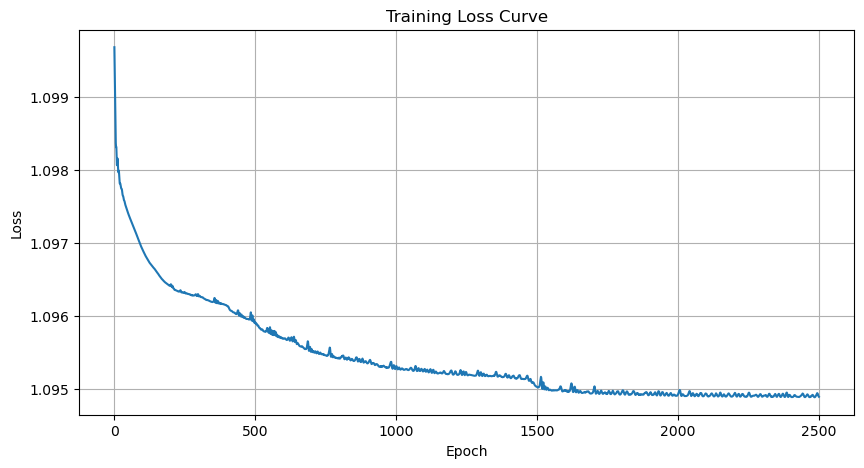

In [64]:
# 在 Jupyter Notebook 中
%matplotlib inline

x = cpugpu(dataset_size=10000, device='cuda', num_classes=3)
x.run_train(2500)
x.plot_loss_curve()  # 单独调用绘图方法
#x.test()